/Users/asulrich/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<IPython.core.display.Javascript object>


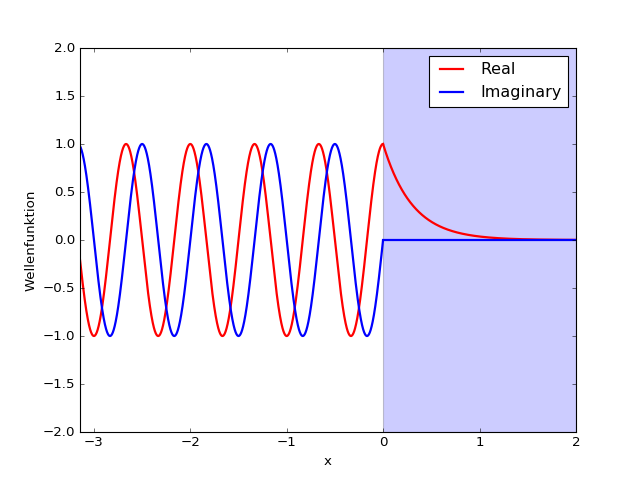

In [1]:
from pylab import *
from ipywidgets import *
import matplotlib.patches as patches

%matplotlib notebook

#initial values
E0 = 20
V0 = 100
a = 1
b = 0
k = sqrt(E0)
kp = sqrt(V0-E0)

#create plot and data
x1 = arange(-3.141592, 0, 0.001)
x2 = arange(0, 2, 0.001)
y1_real = a*cos(k*x1)+b*cos(-k*x1)
y1_imag = a*sin(k*x1)+b*sin(-k*x1)
y2_real = a * exp(-kp*x2)
y2_imag = 0*x2
fig1 = figure()
ax1 = fig1.add_subplot(111)
p1_real, = plot(x1, y1_real, lw=2, color='red', label='Real')
p1_imag, = plot(x1, y1_imag, lw=2, color='blue', label='Imaginary')
p2_real, = plot(x2, y2_real, lw=2, color='red')
p2_imag, = plot(x2, y2_imag, lw=2, color='blue')
axis([-3.141592, 2, -2, 2])
xlabel('x')
ylabel('Wellenfunktion')
l = legend(loc='upper right')
p = ax1.add_patch(patches.Rectangle((0.0, -2.0), 2.0, 4.0, alpha=0.2))

In [2]:
@interact(E=(0.0, 200, 1.0), V=(0.0, 100, 1.0))
def update(E=E0, V=V0):
    k = sqrt(E)
    p1_real.set_ydata(a*cos(k*x1)+b*cos(-k*x1))
    p1_imag.set_ydata(a*sin(k*x1)+b*sin(-k*x1))
    if E < V:
        kp = sqrt(V-E)
        p2_real.set_ydata(a * exp(-kp*x2))
        p2_imag.set_ydata(0*x2)
    else:
        kp = sqrt(E-V)
        p2_real.set_ydata(a*cos(kp*x2)+b*cos(-kp*x2))
        p2_imag.set_ydata(a*sin(kp*x2)+b*sin(-kp*x2))